<a href="https://colab.research.google.com/github/GioLomia/Augmentor/blob/master/Image_Augmentor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.misc
import cv2

#DEMONSTRATION
%matplotlib inline

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd "drive/My Drive/Colab Notebooks/Studio_Corp"

/content/drive/My Drive/Colab Notebooks/Studio_Corp


In [9]:
!ls Healthy\ Skin

healthy_01.png	healthy_05.png	healthy_09.png	healthy_13.png	healthy_17.png
healthy_02.png	healthy_06.png	healthy_10.png	healthy_14.png	healthy_18.png
healthy_03.png	healthy_07.png	healthy_11.png	healthy_15.png	healthy_19.png
healthy_04.png	healthy_08.png	healthy_12.png	healthy_16.png	healthy_20.png


In [0]:
class Augmentor:
    def __init__(self,from_folder,destination_folder):
        #Augmetor
        self.datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest',
            samplewise_std_normalization=True)
        self.im_folder_name=from_folder
        self.destination_folder=destination_folder
        self.all_images=os.listdir(self.im_folder_name) #list all the names of the images
        
    def extract_image_names(self):
        for i in self.all_images:
            if i.endswith('.txt'):
                print(i)
                self.all_images.remove(i)
                
    def demonstrate(self,im_number=0):
        img_path = os.path.join(self.im_folder_name, self.all_images[im_number])
        img = load_img(img_path, target_size=(480, 544))  # this is a PIL image
        x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
        x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

        # The .flow() command below generates batches of randomly transformed images
        # It will loop indefinitely, so we need to `break` the loop at some point!
        i = 0
        for batch in self.datagen.flow(x, batch_size=1):
            plt.figure(i)
            imgplot = plt.imshow(array_to_img(batch[0]))
            i += 1
            if i==5:
                break
    def download_images(self):
        self.im_list=[]
        for i in self.all_images:
            image_path=os.path.join(self.im_folder_name, i)
            print(image_path)
            image=load_img(image_path, target_size=(480, 544))  # this is a PIL image
            image=img_to_array(image)
            image = image.reshape((1,) + image.shape)
            self.im_list.append(image)
            
            
    def augment_and_transfer(self,images_per_image=15):
        num_augmented_im=0
        for n in range(len(self.all_images)):
            im=self.im_list[n]
            for batch in self.datagen.flow(im, batch_size=1,save_to_dir=self.destination_folder,save_prefix='aug_'+self.all_images[n]):
                num_augmented_im+=1
                if num_augmented_im==images_per_image:
                    break
            num_augmented_im=0

In [10]:
!ls

 data		    Image_Augmentor.ipynb
'Healthy Skin'	    Sick_Skin_Aug
 Healthy_Skin_Aug  'სატესტო-ორიგინალი.zip (Unzipped Files)'


In [13]:
augmentor=Augmentor("Healthy Skin","Healthy_Skin_Aug")
augmentor.extract_image_names()
augmentor.download_images()
augmentor.augment_and_transfer()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:353: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Healthy Skin/healthy_01.png
Healthy Skin/healthy_04.png
Healthy Skin/healthy_10.png
Healthy Skin/healthy_05.png
Healthy Skin/healthy_09.png
Healthy Skin/healthy_06.png
Healthy Skin/healthy_03.png
Healthy Skin/healthy_07.png
Healthy Skin/healthy_02.png
Healthy Skin/healthy_08.png
Healthy Skin/healthy_11.png
Healthy Skin/healthy_20.png
Healthy Skin/healthy_18.png
Healthy Skin/healthy_19.png
Healthy Skin/healthy_15.png
Healthy Skin/healthy_16.png
Healthy Skin/healthy_14.png
Healthy Skin/healthy_17.png
Healthy Skin/healthy_13.png
Healthy Skin/healthy_12.png


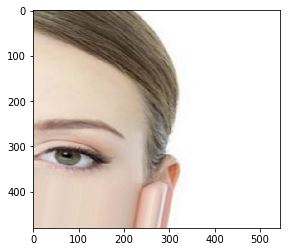

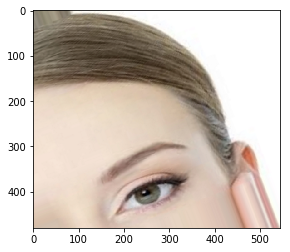

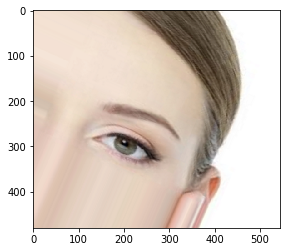

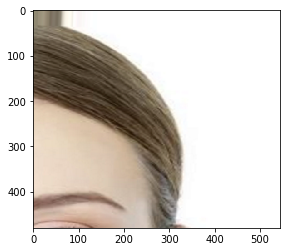

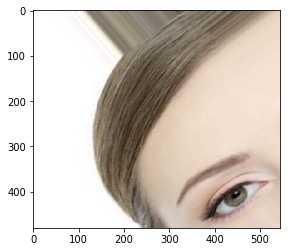

In [14]:
augmentor.demonstrate()

In [0]:
for i in all_images:
    print(os.path.join(im_folder_name, i))